<a href="https://colab.research.google.com/github/jcsnuesi/Car-price-prediction-/blob/main/Proyecto_2_Parte_4_Price_Car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

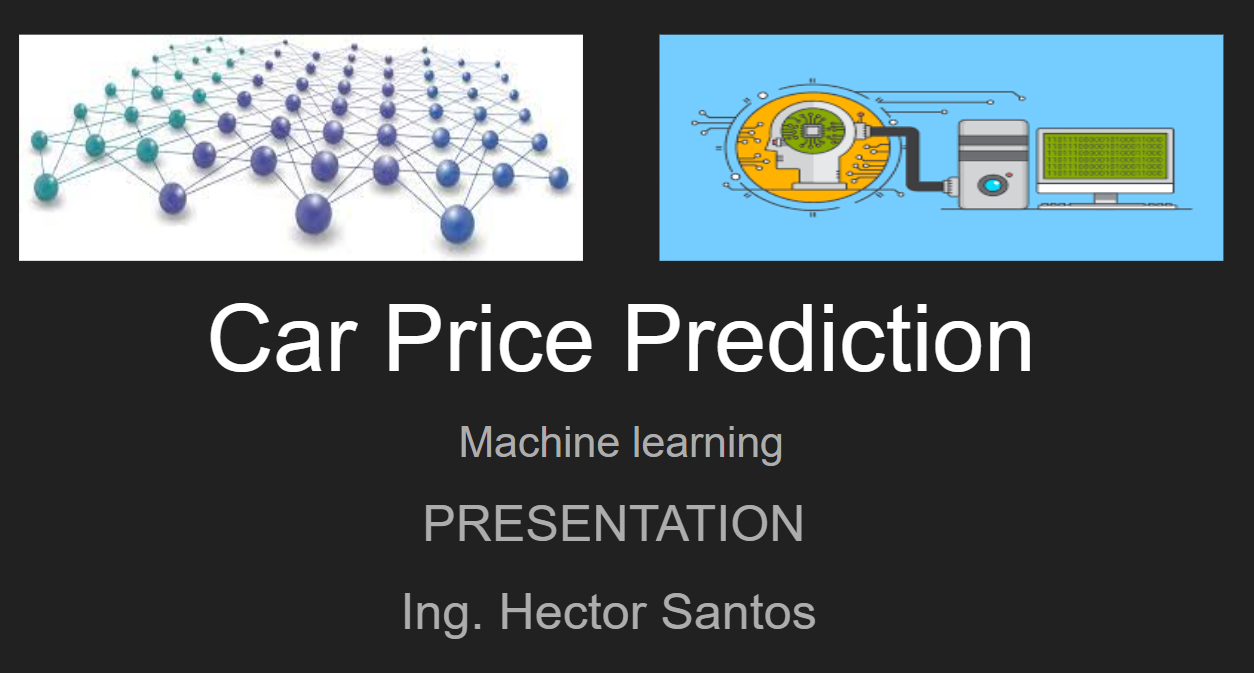

In [220]:
from google.colab import drive
drive.mount('content/')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


In [221]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, classification_report,precision_score,recall_score,accuracy_score, plot_confusion_matrix, confusion_matrix

In [428]:
df = pd.read_csv('/content/content/MyDrive/Colab Notebooks/CarPrice_Assignment.csv')

In [435]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [223]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [385]:
df.shape

(205, 26)

In [386]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [387]:
df_copy = df.copy(deep=True)  

In [464]:
class ReadyToWork:

  def __init__(self,dataSet):

      self.dataSet = dataSet
   
  def checkDuplicated(self):

    duplicatedResponse = self.dataSet.duplicated().sum()

    print('Duplicated data: \n')
    return duplicatedResponse

  def checkMissindData(self):

    missingResponse = self.dataSet.isna().sum()

    return missingResponse

  def checkInconsistencyData(self):

    cat_cols = make_column_selector(dtype_include='object')
    col_details = {}

    for col in cat_cols(self.dataSet):
        col_details[col] = self.dataSet[col].unique()
        
    return col_details

  def replaceInconsistencyData(self,col, key,newKey=''):
      dateSet = self.dataSet[col]
      
      if type(key) == dict:
          dateSet.replace(key, inplace=True)
          print(f'Data replaced "{key}" \n')

      if type(key) == str:
         dateSet.replace(key,newKey, inplace=True)        
         print(f'Data replaced "{key}" to "{newKey}" \n')

     
     
      return dateSet.value_counts()

  def dataSpliter(self,col, delimeter,param=0):

    self.dataSet[col] = self.dataSet[col].apply(lambda x: x.split(delimeter)[param]) 
   
    return self.dataSet

  def ordinalCodification(self, col):
     encoder = LabelEncoder()

     print("************Starting Codification*************** \n")
     for cols in col:
         self.dataSet[cols] = encoder.fit_transform(self.dataSet[cols]) 
         print(encoder.classes_, "\n")
     
     print("************Codification completed*************** \n")
     return 

  def cleaner(self,dataToClean, axis):

  # Drop unnecessary columns
    newDataSet = self.dataSet.drop(columns=dataToClean, axis=axis)

    return  newDataSet


ready_class = ReadyToWork(df_copy)

In [465]:
# Duplicated data
print(ready_class.checkDuplicated())
print('\n')

# Missing data
print('- Missing data:\n\n',ready_class.checkMissindData())
print('\n')

#Check for atypical data
print('- Check for data inconsistencies: \n\n',ready_class.checkInconsistencyData())
print('\n')



Duplicated data: 

0


- Missing data:

 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


- Check for data inconsistencies: 

 {'CarName': array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object), 'aspiration': array(['std', 'turbo'], dtype=object), 'carb

In [466]:
#Param 1: Columna name, Param 2: inconsistency, Param 3: position we want to use for work
splited = ready_class.dataSpliter('CarName',' ',0)
splited.CarName


0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [392]:
ready_class.replaceInconsistencyData('CarName',{'maxda':'mazda','Nissan': 'nissan', 'porcshce': 'porsche',
      'saab':'subaru','toyouta': 'toyota', 'vokswagen':'volkswagen', 'vw':'volvo'})


Data replaced "{'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'saab': 'subaru', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volvo'}" 



toyota         32
subaru         18
nissan         18
mazda          17
volvo          13
honda          13
mitsubishi     13
peugeot        11
volkswagen     10
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: CarName, dtype: int64

In [393]:
# Param 1: column to replace data, Param 2: key to replace, Param 3: new data
print(ready_class.replaceInconsistencyData('carbody','hardtop','convertible'))
print('\n')

#Columns to make an ordinal codification
columns = ['doornumber','enginelocation','fueltype']
ready_class.ordinalCodification(columns)

Data replaced "hardtop" to "convertible" 

sedan          96
hatchback      70
wagon          25
convertible    14
Name: carbody, dtype: int64


************Starting Codification*************** 

['four' 'two'] 

['front' 'rear'] 

['diesel' 'gas'] 

************Codification completed*************** 



In [394]:
drop_cols = ['car_ID', 'symboling','wheelbase','boreratio','enginesize','stroke','compressionratio','curbweight','peakrpm']
# Param 1: columns to drop, Param 2: axis (0 row of column, 1 complete column)
cleaned_dataset = ready_class.cleaner(drop_cols,1)

In [395]:
cleaned_dataset

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,enginetype,cylindernumber,fuelsystem,horsepower,citympg,highwaympg,price
0,alfa-romero,1,std,1,convertible,rwd,0,168.8,64.1,48.8,dohc,four,mpfi,111,21,27,13495.0
1,alfa-romero,1,std,1,convertible,rwd,0,168.8,64.1,48.8,dohc,four,mpfi,111,21,27,16500.0
2,alfa-romero,1,std,1,hatchback,rwd,0,171.2,65.5,52.4,ohcv,six,mpfi,154,19,26,16500.0
3,audi,1,std,0,sedan,fwd,0,176.6,66.2,54.3,ohc,four,mpfi,102,24,30,13950.0
4,audi,1,std,0,sedan,4wd,0,176.6,66.4,54.3,ohc,five,mpfi,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,1,std,0,sedan,rwd,0,188.8,68.9,55.5,ohc,four,mpfi,114,23,28,16845.0
201,volvo,1,turbo,0,sedan,rwd,0,188.8,68.8,55.5,ohc,four,mpfi,160,19,25,19045.0
202,volvo,1,std,0,sedan,rwd,0,188.8,68.9,55.5,ohcv,six,mpfi,134,18,23,21485.0
203,volvo,0,turbo,0,sedan,rwd,0,188.8,68.9,55.5,ohc,six,idi,106,26,27,22470.0


In [234]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    object 
 1   fueltype        205 non-null    int64  
 2   aspiration      205 non-null    object 
 3   doornumber      205 non-null    int64  
 4   carbody         205 non-null    object 
 5   drivewheel      205 non-null    object 
 6   enginelocation  205 non-null    int64  
 7   carlength       205 non-null    float64
 8   carwidth        205 non-null    float64
 9   carheight       205 non-null    float64
 10  enginetype      205 non-null    object 
 11  cylindernumber  205 non-null    object 
 12  fuelsystem      205 non-null    object 
 13  horsepower      205 non-null    int64  
 14  citympg         205 non-null    int64  
 15  highwaympg      205 non-null    int64  
 16  price           205 non-null    float64
dtypes: float64(4), int64(6), object(7)


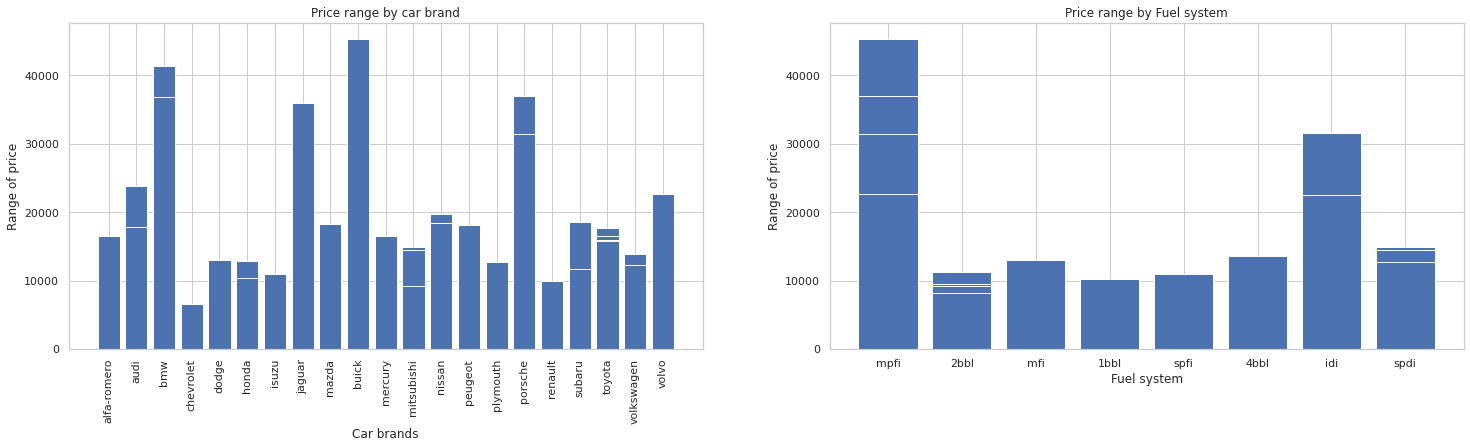

In [396]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt.bar(cleaned_dataset.CarName,cleaned_dataset.price)
plt.title('Price range by car brand') 
plt.xlabel('Car brands')
plt.ylabel('Range of price')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(cleaned_dataset.fuelsystem,cleaned_dataset.price)
plt.title('Price range by Fuel system')
plt.xlabel('Fuel system')
plt.ylabel('Range of price')



plt.show()


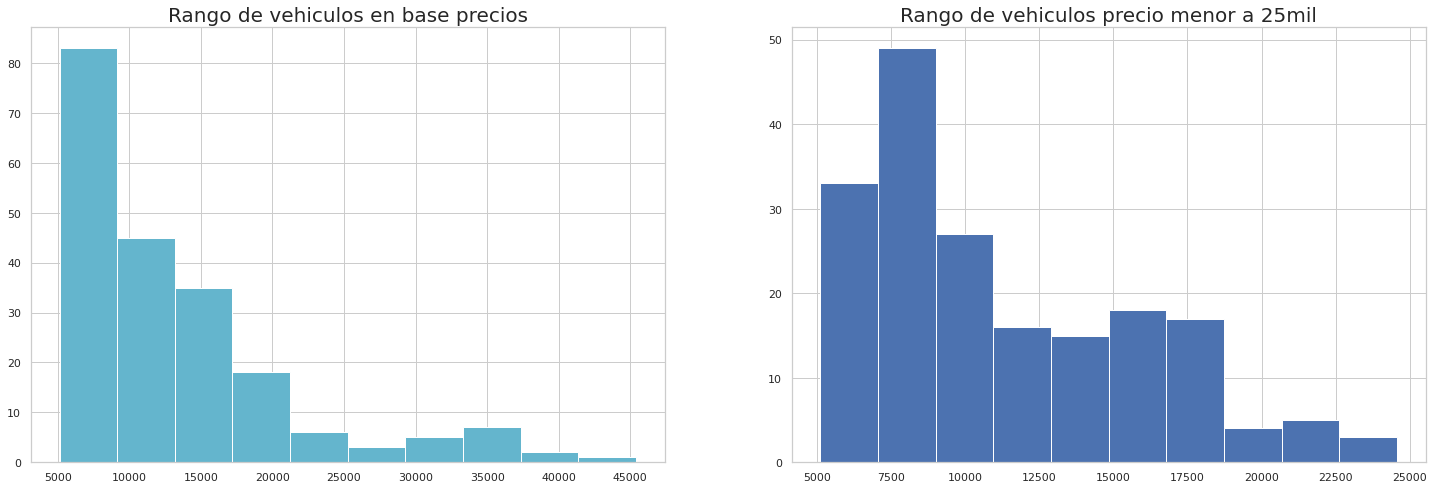

In [397]:
sns.set(style='whitegrid')
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.hist(cleaned_dataset['price'],  color = 'c')
plt.title('Rango de vehiculos en base precios', size=20)

plt.subplot(1,2,2)
cleaned_dataset.price[cleaned_dataset.price < 25000].hist()
plt.title('Rango de vehiculos precio menor a 25mil', size=20)





plt.show()

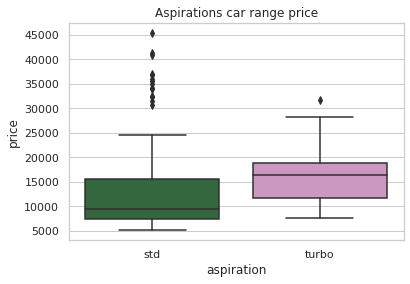

In [398]:
plt.title('Aspirations car range price')
sns.boxplot(x=cleaned_dataset.aspiration, y=cleaned_dataset.price, palette=("cubehelix"))
plt.show()

<ipython-input-399-6f1f2d87330a>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,4,1)


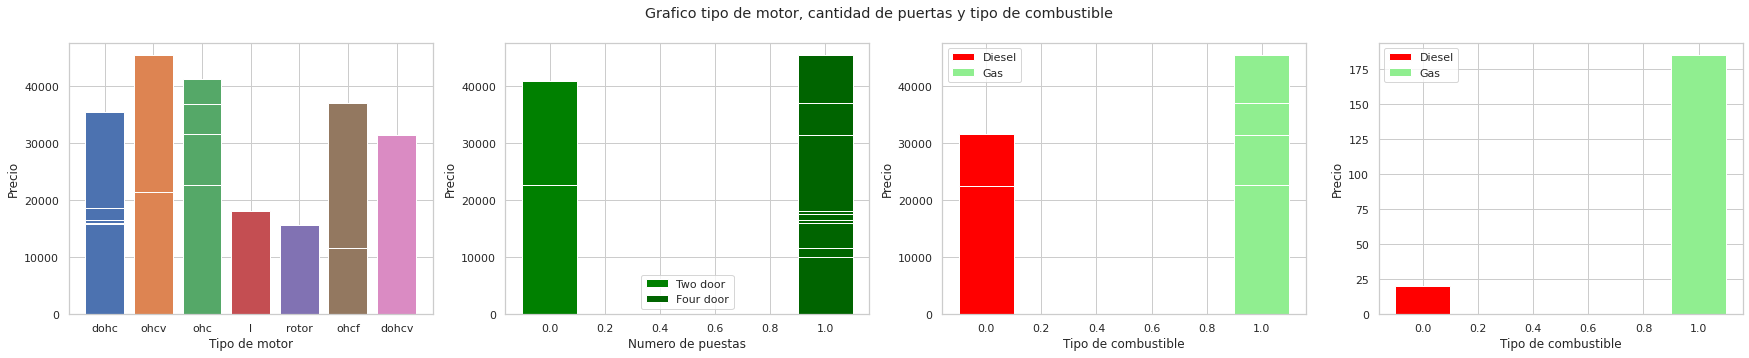

In [399]:
sns.set(style='whitegrid')

fig = plt.figure(figsize=(30,5))

for engine  in cleaned_dataset.enginetype.unique():
    fig.suptitle('Grafico tipo de motor, cantidad de puertas y tipo de combustible')
    plt.subplot(1,4,1)
    plt.bar(cleaned_dataset.enginetype[cleaned_dataset.enginetype==engine], cleaned_dataset.price[cleaned_dataset.enginetype==engine])
    
    plt.xlabel("Tipo de motor")
    plt.ylabel("Precio")

plt.subplot(1,4,2)
plt.bar(cleaned_dataset.doornumber[cleaned_dataset.doornumber==0], cleaned_dataset.price[cleaned_dataset.doornumber==0], width=0.2 ,color='green')
plt.bar(cleaned_dataset.doornumber[cleaned_dataset.doornumber==1], cleaned_dataset.price[cleaned_dataset.doornumber==1],  width=0.2 ,color='darkgreen')
plt.xlabel("Numero de puestas")
plt.ylabel("Precio")
plt.legend(['Two door','Four door'])

plt.subplot(1,4,3)
plt.bar(cleaned_dataset.fueltype[cleaned_dataset.fueltype==0],cleaned_dataset.price[cleaned_dataset.fueltype==0], width=0.2 ,color='red')
plt.bar(cleaned_dataset.fueltype[cleaned_dataset.fueltype==1],cleaned_dataset.price[cleaned_dataset.fueltype==1], width=0.2 ,color='lightgreen')
plt.xlabel("Tipo de combustible")
plt.ylabel("Precio")
plt.legend(['Diesel','Gas'])


plt.subplot(1,4,4)
plt.bar(cleaned_dataset.fueltype[cleaned_dataset.fueltype==0],len(cleaned_dataset.fueltype[cleaned_dataset.fueltype==0]), width=0.2 ,color='red')
plt.bar(cleaned_dataset.fueltype[cleaned_dataset.fueltype==1],len(cleaned_dataset.fueltype[cleaned_dataset.fueltype==1]), width=0.2 ,color='lightgreen')
plt.xlabel("Tipo de combustible")
plt.ylabel("Precio")
plt.legend(['Diesel','Gas'])


In [408]:
X = cleaned_dataset.drop(columns='price')
y =  cleaned_dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

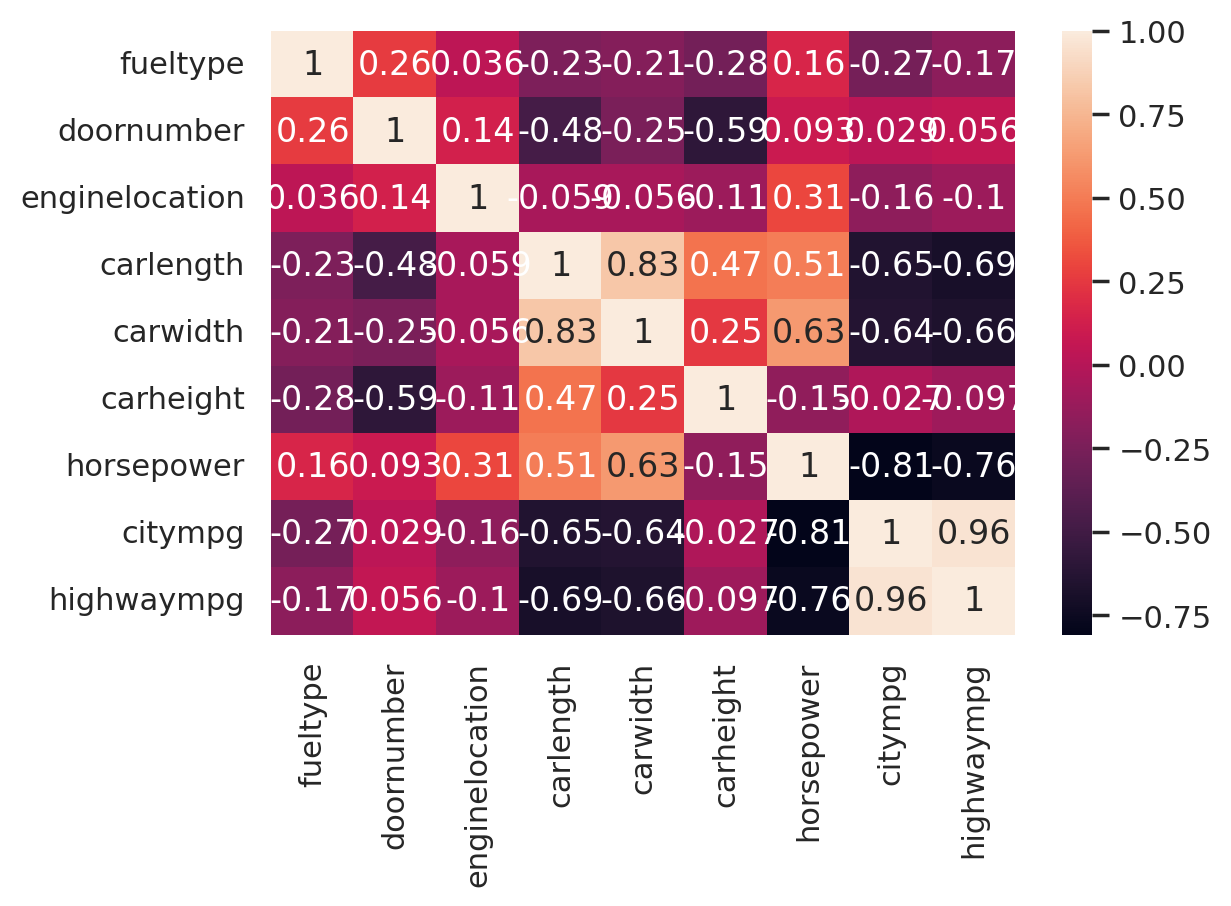

In [239]:
plt.figure(dpi=200)
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [467]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(137, 16)
(68, 16)
(137,)
(68,)


In [410]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
scaler = StandardScaler()

cat_col = cat_selector(X_train)
num_col = num_selector(X_train)

cat_tupla =  (ohe,cat_col)
num_tupla =  (scaler,num_col)

preprocessing = make_column_transformer(cat_tupla,num_tupla)

In [411]:
X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed = preprocessing.transform(X_test)

In [468]:
print('Train:',X_train_processed.shape)
print('Test:',X_test_processed.shape)

Train: (137, 58)
Test: (68, 58)


In [421]:
class Models:

  def __init__(self,Xtrain_processed,Xtest_processed, ytrain, ytest):

    self.xtrain = Xtrain_processed
    self.xtest = Xtest_processed
    self.ytrain = ytrain
    self.ytest = ytest

  
  def randomForestModel(self,estimators=100,depth=1):
    
    for inc in range(0,depth):
      lgreg = RandomForestRegressor(n_estimators=estimators, max_depth=inc+1)
      lgreg.fit(X_train_processed,y_train)

      X_train_lg = lgreg.score(self.xtrain, y_train)
      X_test_lg = lgreg.score(self.xtest, y_test)

      pred = lgreg.predict(self.xtrain)
      print('\n************Max depth #',inc+1,'**************')
      print('\nRendimiendo datos de entremaniento:',X_train_lg, '\n')
      print('Rendimiendo datos de prueba:', X_test_lg, '\n')
      print('Predicciones de los datos de entrenamiento: \n\n',np.round(pred))

    return pred

  def LinealRegression(self):

     reg = LinearRegression()
     reg.fit(self.xtrain,self.ytrain)

     train_score = reg.score(self.xtrain, self.ytrain)
     test_score =  reg.score(self.xtest, self.ytest)

     ypred_train = reg.predict(self.xtrain)
     ypred_test = reg.predict(self.xtest)

     r2_train = r2_score(self.ytrain, ypred_train)
     r2_test = r2_score(self.ytest, ypred_test)    
     print('Rendimiendo datos de entremaniento:',train_score, '\n')
     print('Rendimiendo datos de prueba:', test_score, '\n')
     print(' R2 coeficiente de los datos de entrenamiento: ',r2_train,'\n')
     print(' R2 coeficiente de prueba:', r2_test, '\n')
     print('Predicciones de los datos de entrenamiento: \n\n',ypred_train)

     
     return ypred_train
        
  def knn(self,neighbors=1):

    for inc in range(0,neighbors):
        knn =  KNeighborsRegressor(n_neighbors=inc+1)
        knn.fit(self.xtrain, y_train)
        knn_score_train = knn.score(self.xtrain, self.ytrain)
        knn_score_test = knn.score(self.xtest, self.ytest)
        knn_predict =  knn.predict(self.xtrain)
        print('\n************N neighbors #',inc+1,'**************')
        print('\nRendimiendo datos de entremaniento:',knn_score_train, '\n')
        print('Rendimiendo datos de prueba:', knn_score_test, '\n')
        print('Predicciones de los datos de entrenamiento: \n\n',knn_predict)

    return knn_predict

chooseModel = Models(X_train_processed,X_test_processed, y_train, y_test)

In [422]:
# No hyperparams
preds = chooseModel.LinealRegression()

Rendimiendo datos de entremaniento: 0.9725427722710092 

Rendimiendo datos de prueba: -9.302498609016453e+22 

 R2 coeficiente de los datos de entrenamiento:  0.9725427722710092 

 R2 coeficiente de prueba: -9.302498609016453e+22 

Predicciones de los datos de entrenamiento: 

 [21956. 11914.  7376. 17940.  6994.  5968. 13826.  8250. 11412. 13732.
  5764.  7672.  6252. 18052. 17846. 17428. 16710.  5764. 11020.  6588.
 33120.  8852.  3610.  6782. 16350. 10482.  6150. 14614. 12410.  6760.
 18320. 18990.  6910. 19858.  8380. 33120. 16046.  7626. 16204.  6208.
 14044. 10468. 13908.  9478. 18040. 10694.  6298.  5930. 14748. 14862.
  7976.  8746. 31626. 21988. 10860.  8282.  8084.  8894.  7100. 15984.
  8598.  8558.  8634. 12990.  8656. 10190. 14804. 33934.  6274.  7028.
  7430.  7470. 13974. 19504.  6560. 14614.  9026.  7524.  9162. 36034.
 10272.  6760. 19126. 16350.  6274. 12914. 16076.  9026.  6274. 22972.
 21600. 10482. 11094.  9686. 33154. 36860. 16916. 14504. 10984. 19650.
  9908.  65

In [424]:
car_df_rl = pd.DataFrame({'Car Bran':X_train['CarName'],'fueltype':X_train['fueltype'], 'price': preds})
car_df_rl

,Car Bran,fueltype,price
125,porsche,1,21956.0
42,honda,1,11914.0
156,toyota,1,7376.0
136,subaru,1,17940.0
140,subaru,1,6994.0
...,...,...,...
106,nissan,1,16554.0
14,bmw,1,24938.0
92,nissan,1,6554.0
179,toyota,1,17960.0


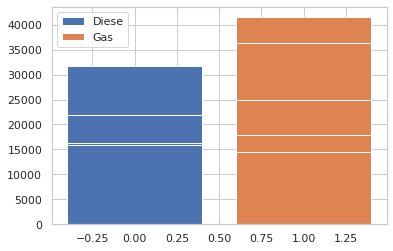

In [457]:
plt.bar(car_df_rl.fueltype[car_df_rl.fueltype==0],car_df_rl.price[car_df_rl.fueltype==0])
plt.bar(car_df_rl.fueltype[car_df_rl.fueltype==1],car_df_rl.price[car_df_rl.fueltype==1])
plt.legend(['Diese','Gas'])

In [426]:
# Param 1: n_estimators=(by default 100), Param 2: max_depth=(by default 1)
random_pred = chooseModel.randomForestModel(200,3)


************Max depth # 1 **************

Rendimiendo datos de entremaniento: 0.717063470083981 

Rendimiendo datos de prueba: 0.6440521171297342 

Predicciones de los datos de entrenamiento: 

 [15617. 10496. 10496. 16091. 10496. 10496. 13517. 10549. 13043. 15617.
 10496. 10496. 10496. 16091. 14324. 15617. 17396. 10496. 10549. 10496.
 21726. 10496. 10496. 10496. 13225. 10496. 10496. 13335. 10496. 10496.
 10549. 17432. 10496. 19321. 10496. 21726. 13100. 10496. 15258. 10496.
 13517. 10496. 13517. 10549. 10549. 10496. 10496. 10496. 10553. 13517.
 10496. 10496. 21546. 16133. 10496. 10496. 10549. 10496. 10496. 10496.
 10496. 10496. 10496. 10549. 10496. 10496. 10553. 27034. 10496. 10496.
 10549. 10496. 10496. 21726. 10496. 13335. 10496. 10496. 10549. 27364.
 10553. 10496. 19321. 13225. 10496. 15617. 17775. 10496. 10496. 24024.
 17119. 10496. 10496. 10496. 27364. 24754. 17775. 13335. 10553. 17432.
 10496. 10496. 13517. 10496. 16581. 10553. 18899. 27034. 10553. 10496.
 16542. 10496. 13100. 2

El modelo de produccion elegido para este proyecto es el de Random Forest, ya que es posible ajustar la profundida del arbol hasta encontrar la profundidad adecuada y manejar los estimadores para evitar sobre ajuste en el resultado.

In [469]:
car_df_rf = pd.DataFrame({'Car Bran':X_train['CarName'],'fueltype':X_train['fueltype'], 'price': random_pred})
car_df_rf

,Car Bran,fueltype,price
125,porsche,1,17770.386484
42,honda,1,9423.199731
156,toyota,1,7341.795805
136,subaru,1,16667.155141
140,subaru,1,7688.263984
...,...,...,...
106,nissan,1,17032.438776
14,bmw,1,17251.108906
92,nissan,1,7309.035198
179,toyota,1,16987.446445


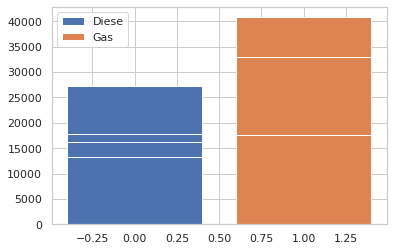

In [459]:
plt.bar(car_df_rf.fueltype[car_df_rf.fueltype==0],car_df_rf.price[car_df_rf.fueltype==0])
plt.bar(car_df_rf.fueltype[car_df_rf.fueltype==1],car_df_rf.price[car_df_rf.fueltype==1])
plt.legend(['Diese','Gas'])

In [252]:
# n_neighbors = (by default 1)
knnPreds = chooseModel.knn(5)


************N neighbors # 1 **************

Rendimiendo datos de entremaniento: 0.9943992944466865 

Rendimiendo datos de prueba: 0.8978539069086919 

Predicciones de los datos de entrenamiento: 

 [22018.  10345.   6938.  18150.   7603.   6095.  16695.   9538.  12945.
 12764.   6669.   7957.   7609.  18620.  16845.  18150.  16500.   6669.
 11048.   7609.  34028.   6989.   5118.   7295.  17075.  10595.   6377.
 15510.  13845.   6529.  16925.  18950.   8058.  17710.   8558.  34028.
 15985.   7126.  17450.   5399.  12440.   9495.  16630.   8013.  16430.
 10245.   5572.   5348.  11199.  13495.   7995.   7975.  31600.  22470.
 11245.   8916.5  9298.   8921.  10295.  13200.   8921.   7957.   8778.
 11595.   8499.   8845.  17669.  32250.   7299.   7898.   6785.   7775.
 13950.  19699.   6695.  12170.   8195.   8358.   9980.  36000.   9959.
  6529.  18920.  17075.   6649.  14869.  15750.   8195.   5499.  23875.
 21105.  10595.  10898.   9895.  36880.  35056.  15690.  15040.  11549.
 18420.  

In [470]:
car_df_knn = pd.DataFrame({'Car Bran':X_train['CarName'],'fueltype':X_train['fueltype'], 'price': knnPreds})
car_df_knn

,Car Bran,fueltype,price
125,porsche,1,14943.8
42,honda,1,9235.8
156,toyota,1,7316.8
136,subaru,1,16663.6
140,subaru,1,6209.8
...,...,...,...
106,nissan,1,18522.8
14,bmw,1,18854.0
92,nissan,1,7365.2
179,toyota,1,16467.4


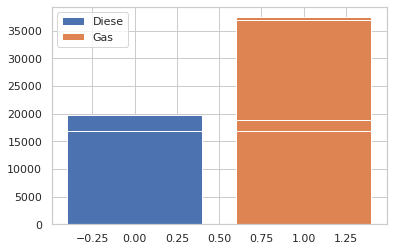

In [460]:
plt.bar(car_df_knn.fueltype[car_df_knn.fueltype==0],car_df_knn.price[car_df_knn.fueltype==0])
plt.bar(car_df_knn.fueltype[car_df_knn.fueltype==1],car_df_knn.price[car_df_knn.fueltype==1])
plt.legend(['Diese','Gas'])

1) Fuente de datos

Kaggle - car price prediction

2) Breve descripción de datos

 205 Filas, 25 Columnas.
 No existes datos nulos
 Columnas categorias y numericas

3) ¿Cuál es el objetivo?

Entrenar nuestro modelo para la prediccion de precios de vehiculos en base a sus caracteristicas.

4) ¿Este es un problema de clasificación o regresión?

Este es un problema de regresion, debido que tenemos que obtener un valor o cifra en base a las caracteristicas de los datos de los vehiculos.

5) ¿Cuántas características hay?

Columnas object, interger y float

6) ¿Cuántas filas de datos hay?

205 filas

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

Primero tuve que hacer una codificacion ordinal a las columnas con valores con orden secuencial, como resultado el tipo de dato cambio de object a int, luego procedia a una codificacion one hot para la columnas categoricas no ordenadas gerarquicamente y por ultimo escalamiento de los valores para en mejor manejo de la data. Todo esto antes de instancia el modelo.